<a href="https://colab.research.google.com/github/Peckkie/DPDM2021/blob/main/1_COVID_19_Data_Downloading_and_Cleansing_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE)

#1 Data Source : COVID-19 Data  by CSSE
https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series

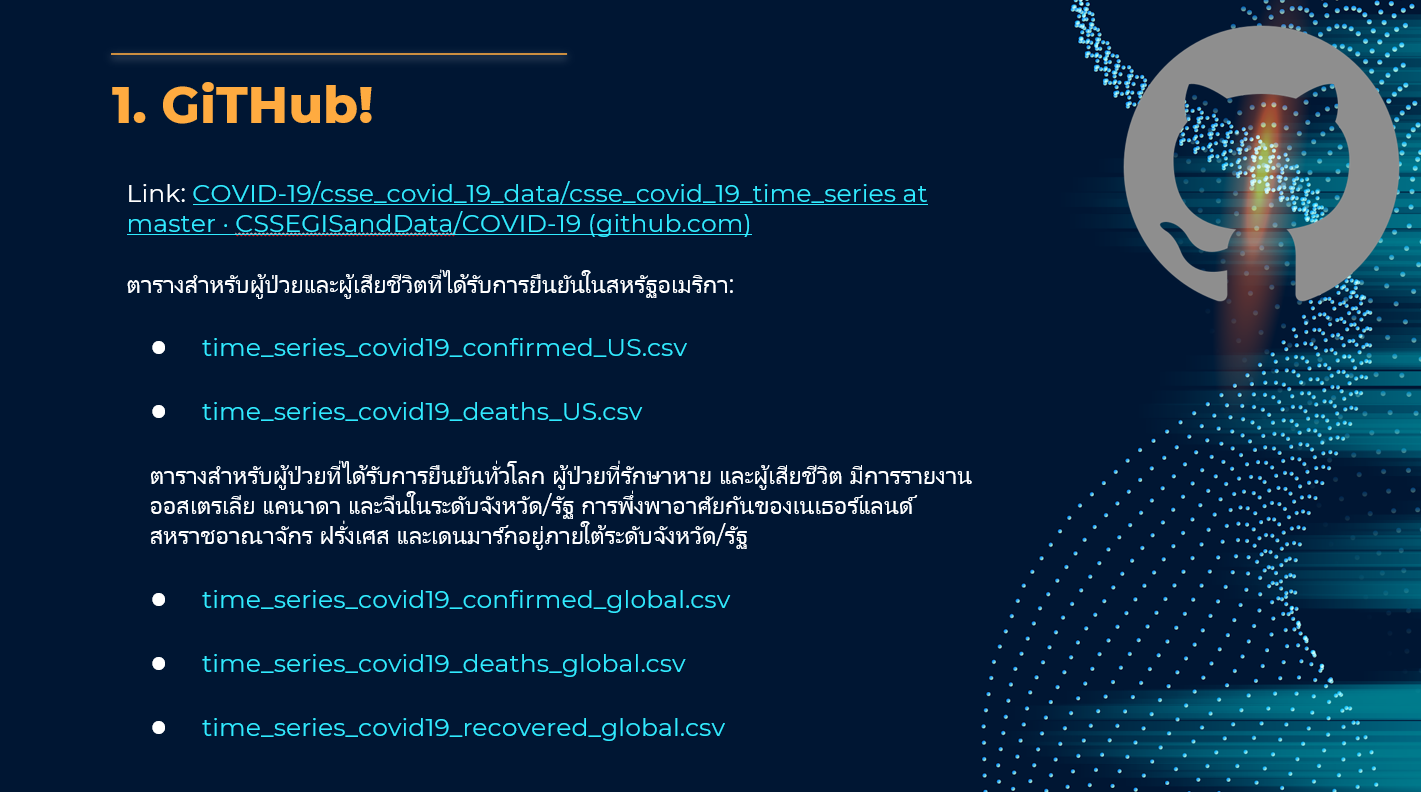

In [1]:
from google.colab import drive # เชื่อม google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir( '/content/drive/MyDrive/DPDM_ME/my_project/data') # local path
!pwd

/content/drive/MyDrive/DPDM_ME/my_project/data


In [ ]:
# !rm *.csv

## Libraries

In [3]:
# import libraries
# ===========================================================

# for date and time opeations
from datetime import datetime, timedelta 
# for file and folder operations
import os 
# for regular expression opeations
import re 
# for listing files in a folder
import glob 
# for getting web contents
import requests 
# storing and analysing data
import pandas as pd 
# for scraping web contents
from bs4 import BeautifulSoup 
# numerical analysis
import numpy as np 

In [4]:
!pip install wget
# to download data
import wget 

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=e4479e7ff768fca8b662980c8ec7136c11cb0b28da530d41fcbebff2f46be442
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


## Downloading data

In [5]:
# remove all existing csv files
# ! rm *.csv

# urls of the files
urls = ['https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv', 
        'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv',
        'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv']

# download files
for url in urls:
    filename = wget.download(url)

## Dataframes

In [6]:
# dataset
# ====================================

conf_df = pd.read_csv('time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('time_series_covid19_deaths_global.csv')
recv_df = pd.read_csv('time_series_covid19_recovered_global.csv')

In [7]:
conf_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,8/17/21,8/18/21,8/19/21,8/20/21,8/21/21,8/22/21,8/23/21,8/24/21,8/25/21,8/26/21,8/27/21,8/28/21,8/29/21,8/30/21,8/31/21,9/1/21,9/2/21,9/3/21,9/4/21,9/5/21,9/6/21,9/7/21,9/8/21,9/9/21,9/10/21,9/11/21,9/12/21,9/13/21,9/14/21,9/15/21,9/16/21,9/17/21,9/18/21,9/19/21,9/20/21,9/21/21,9/22/21,9/23/21,9/24/21,9/25/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,...,152243,152363,152411,152448,152497,152511,152583,152660,152722,152822,152960,153007,153033,153148,153220,153260,153306,153375,153395,153423,153534,153626,153736,153840,153962,153982,153990,154094,154180,154283,154361,154487,154487,154487,154585,154712,154757,154800,154960,154960
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,136598,137075,137597,138132,138790,139324,139721,140521,141365,142253,143174,144079,144847,145333,146387,147369,148222,149117,150101,150997,151499,152239,153318,154316,155293,156162,157026,157436,158431,159423,160365,161324,162173,162953,163404,164276,165096,165864,166690,167354
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,188663,189384,190078,190656,191171,191583,192089,192626,193171,193674,194186,194671,195162,195574,196080,196527,196915,197308,197659,198004,198313,198645,198962,199275,199560,199822,200068,200301,200528,200770,200989,201224,201425,201600,201766,201948,202122,202283,202449,202574
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,14960,14976,14981,14988,14988,14988,15002,15003,15014,15016,15025,15025,15025,15032,15033,15046,15052,15055,15055,15055,15069,15070,15070,15078,15083,15083,15083,15096,15099,15108,15113,15124,15124,15124,15140,15140,15153,15156,15167,15167
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,44972,45175,45325,45583,45817,45945,46076,46340,46539,46726,46929,47079,47168,47331,47544,47781,48004,48261,48475,48656,48790,49114,49349,49628,49943,50348,50446,50738,51047,51407,51827,52208,52307,52307,52644,52968,53387,53840,54280,54795


In [8]:
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,8/17/21,8/18/21,8/19/21,8/20/21,8/21/21,8/22/21,8/23/21,8/24/21,8/25/21,8/26/21,8/27/21,8/28/21,8/29/21,8/30/21,8/31/21,9/1/21,9/2/21,9/3/21,9/4/21,9/5/21,9/6/21,9/7/21,9/8/21,9/9/21,9/10/21,9/11/21,9/12/21,9/13/21,9/14/21,9/15/21,9/16/21,9/17/21,9/18/21,9/19/21,9/20/21,9/21/21,9/22/21,9/23/21,9/24/21,9/25/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7031,7043,7047,7054,7065,7070,7076,7083,7090,7093,7101,7103,7109,7116,7118,7123,7127,7127,7128,7132,7141,7144,7151,7157,7164,7167,7167,7169,7171,7174,7183,7186,7186,7186,7199,7199,7199,7199,7199,7199
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2468,2471,2473,2475,2477,2478,2478,2480,2483,2486,2487,2490,2492,2495,2498,2501,2505,2508,2512,2515,2519,2523,2528,2531,2535,2539,2543,2548,2553,2557,2563,2569,2574,2580,2587,2594,2601,2609,2619,2629
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4867,4898,4929,4957,4984,5004,5034,5063,5096,5121,5148,5179,5209,5240,5269,5302,5339,5373,5399,5420,5445,5471,5489,5519,5539,5558,5578,5596,5614,5630,5651,5670,5681,5694,5709,5725,5739,5748,5758,5767
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,129,129,129,129,129,129,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1118,1125,1133,1138,1140,1153,1163,1166,1176,1182,1186,1192,1201,1210,1217,1227,1235,1248,1258,1270,1282,1299,1309,1313,1322,1327,1339,1345,1358,1360,1371,1378,1388,1388,1409,1414,1434,1460,1471,1487


In [9]:
recv_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,8/17/21,8/18/21,8/19/21,8/20/21,8/21/21,8/22/21,8/23/21,8/24/21,8/25/21,8/26/21,8/27/21,8/28/21,8/29/21,8/30/21,8/31/21,9/1/21,9/2/21,9/3/21,9/4/21,9/5/21,9/6/21,9/7/21,9/8/21,9/9/21,9/10/21,9/11/21,9/12/21,9/13/21,9/14/21,9/15/21,9/16/21,9/17/21,9/18/21,9/19/21,9/20/21,9/21/21,9/22/21,9/23/21,9/24/21,9/25/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Merging dataframes

In [10]:
# see  columns date
conf_df.columns[4:]

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '9/16/21', '9/17/21', '9/18/21', '9/19/21', '9/20/21', '9/21/21',
       '9/22/21', '9/23/21', '9/24/21', '9/25/21'],
      dtype='object', length=613)

In [11]:
# extract dates
dates = conf_df.columns[4:]

# melt dataframes into longer format
# =========================================================
conf_df_long = conf_df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
                            value_vars=dates, var_name='Date', value_name='Confirmed')

deaths_df_long = deaths_df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
                            value_vars=dates, var_name='Date', value_name='Deaths')

recv_df_long = recv_df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
                            value_vars=dates, var_name='Date', value_name='Recovered')

# recv_df_long = recv_df_long[recv_df_long['Country/Region']!='Canada']

print(conf_df_long.shape)
print(deaths_df_long.shape)
print(recv_df_long.shape)

(171027, 6)
(171027, 6)
(161832, 6)


In [12]:
# merge dataframes : เชื่อมทีละตาราง
# ==============================================

full_table = pd.merge(left=conf_df_long, right=deaths_df_long, how='left',
                      on=['Province/State', 'Country/Region', 'Date', 'Lat', 'Long'])
full_table = pd.merge(left=full_table, right=recv_df_long, how='left',
                      on=['Province/State', 'Country/Region', 'Date', 'Lat', 'Long'])

full_table.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0,0,0.0
1,NaN,Albania,41.15330,20.168300,1/22/20,0,0,0.0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0,0,0.0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0,0,0.0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0,0,0.0


### Create new column

In [13]:
# Active Case = confirmed - deaths - recovered
full_table['Active'] = full_table['Confirmed'] - full_table['Deaths'] - full_table['Recovered']

## Preprocessing

### Missing/Null Checking

In [14]:
full_table.isnull().any()

Province/State     True
Country/Region    False
Lat                True
Long               True
Date              False
Confirmed         False
Deaths            False
Recovered          True
Active             True
dtype: bool

In [15]:
# fill na with 0
full_table['Recovered'] = full_table['Recovered'].fillna(0)

In [16]:
full_table.isnull().any()

Province/State     True
Country/Region    False
Lat                True
Long               True
Date              False
Confirmed         False
Deaths            False
Recovered         False
Active             True
dtype: bool

In [17]:
# filling missing values 
# fill missing province/state value with ''
full_table[['Province/State']] = full_table[['Province/State']].fillna('')

In [18]:
full_table.isnull().any()

Province/State    False
Country/Region    False
Lat                True
Long               True
Date              False
Confirmed         False
Deaths            False
Recovered         False
Active             True
dtype: bool

In [19]:
# fill na with 0
full_table['Active'] = full_table['Active'].fillna(0)

In [20]:
full_table.isnull().any()

Province/State    False
Country/Region    False
Lat                True
Long               True
Date              False
Confirmed         False
Deaths            False
Recovered         False
Active            False
dtype: bool

### Data type checking

In [22]:
full_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171027 entries, 0 to 171026
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Province/State  171027 non-null  object 
 1   Country/Region  171027 non-null  object 
 2   Lat             169801 non-null  float64
 3   Long            169801 non-null  float64
 4   Date            171027 non-null  object 
 5   Confirmed       171027 non-null  int64  
 6   Deaths          171027 non-null  int64  
 7   Recovered       171027 non-null  float64
 8   Active          171027 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 13.0+ MB


In [23]:
# Convert to  date format
full_table['Date'] = pd.to_datetime(full_table['Date'])

# convert to int datatype
full_table['Recovered'] = full_table['Recovered'].astype('int')
full_table['Active'] = full_table['Active'].astype('int')

In [24]:
full_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171027 entries, 0 to 171026
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Province/State  171027 non-null  object        
 1   Country/Region  171027 non-null  object        
 2   Lat             169801 non-null  float64       
 3   Long            169801 non-null  float64       
 4   Date            171027 non-null  datetime64[ns]
 5   Confirmed       171027 non-null  int64         
 6   Deaths          171027 non-null  int64         
 7   Recovered       171027 non-null  int64         
 8   Active          171027 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 13.0+ MB


### Outliers checking

In [25]:
# fixing Country names
# ===========================================================

In [26]:
# renaming countries, regions, provinces
full_table[full_table['Country/Region'] =='Korea, South']

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
160,,"Korea, South",35.907757,127.766922,2020-01-22,1,0,0,1
439,,"Korea, South",35.907757,127.766922,2020-01-23,1,0,0,1
718,,"Korea, South",35.907757,127.766922,2020-01-24,2,0,0,2
997,,"Korea, South",35.907757,127.766922,2020-01-25,2,0,0,2
1276,,"Korea, South",35.907757,127.766922,2020-01-26,3,0,0,3
...,...,...,...,...,...,...,...,...,...
169792,,"Korea, South",35.907757,127.766922,2021-09-21,290983,2419,0,288564
170071,,"Korea, South",35.907757,127.766922,2021-09-22,292699,2427,0,290272
170350,,"Korea, South",35.907757,127.766922,2021-09-23,295132,2434,0,292698
170629,,"Korea, South",35.907757,127.766922,2021-09-24,298402,2441,0,295961


In [27]:
full_table['Country/Region'] = full_table['Country/Region'].replace('Korea, South', 'South Korea')

In [31]:
# Greenland
full_table.loc[full_table['Province/State']=='Greenland', 'Country/Region']

103       Greenland
382       Greenland
661       Greenland
940       Greenland
1219      Greenland
            ...    
169735    Greenland
170014    Greenland
170293    Greenland
170572    Greenland
170851    Greenland
Name: Country/Region, Length: 613, dtype: object

In [29]:
full_table[full_table['Province/State']=='Greenland']

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
103,Greenland,Denmark,71.7069,-42.6043,2020-01-22,0,0,0,0
382,Greenland,Denmark,71.7069,-42.6043,2020-01-23,0,0,0,0
661,Greenland,Denmark,71.7069,-42.6043,2020-01-24,0,0,0,0
940,Greenland,Denmark,71.7069,-42.6043,2020-01-25,0,0,0,0
1219,Greenland,Denmark,71.7069,-42.6043,2020-01-26,0,0,0,0
...,...,...,...,...,...,...,...,...,...
169735,Greenland,Denmark,71.7069,-42.6043,2021-09-21,504,0,0,504
170014,Greenland,Denmark,71.7069,-42.6043,2021-09-22,528,0,0,528
170293,Greenland,Denmark,71.7069,-42.6043,2021-09-23,541,0,0,541
170572,Greenland,Denmark,71.7069,-42.6043,2021-09-24,553,0,0,553


In [30]:
full_table.loc[full_table['Province/State']=='Greenland', 'Country/Region'] = 'Greenland'

### Removing

In [32]:
# random rows
full_table.sample(6)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
78884,,Pakistan,30.3753,69.3451,2020-10-30,332993,6806,314066,12121
164511,,Marshall Islands,7.1315,171.1845,2021-09-02,4,0,0,4
5995,,Greece,39.0742,21.8243,2020-02-12,0,0,0,0
131969,,Algeria,28.0339,1.6596,2021-05-09,124104,3328,86420,34356
48641,,Congo (Kinshasa),-4.0383,21.7587,2020-07-14,8135,190,3948,3997
96296,Diamond Princess,Canada,0.0000,0.0000,2021-01-01,0,1,0,0


### Fixing off data

In [33]:
# new values
feb_12_conf = {'Hubei' : 34874}

In [34]:
# function to change value
def change_val(date, ref_col, val_col, dtnry):
    for key, val in dtnry.items():
        full_table.loc[(full_table['Date']==date) & (full_table[ref_col]==key), val_col] = val

In [35]:
# changing values
change_val('2/12/20', 'Province/State', 'Confirmed', feb_12_conf)

In [36]:
# checking values
full_table[(full_table['Date']=='2/12/20') & (full_table['Province/State']=='Hubei')]

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
5930,Hubei,China,30.9756,112.2707,2020-02-12,34874,1068,2686,29612


In [37]:
# Ship
# ====

# ship rows containing ships with COVID-19 reported cases
ship_rows = full_table['Province/State'].str.contains('Grand Princess') | \
            full_table['Province/State'].str.contains('Diamond Princess') | \
            full_table['Country/Region'].str.contains('Diamond Princess') | \
            full_table['Country/Region'].str.contains('MS Zaandam')

# ship
ship = full_table[ship_rows]

# Latest cases from the ships
ship_latest = ship[ship['Date']==max(ship['Date'])]
# ship_latest.style.background_gradient(cmap='Pastel1_r')

# skipping rows with ships info
full_table = full_table[~(ship_rows)]

#2 WHO Region
https://en.wikipedia.org/wiki/WHO_regions

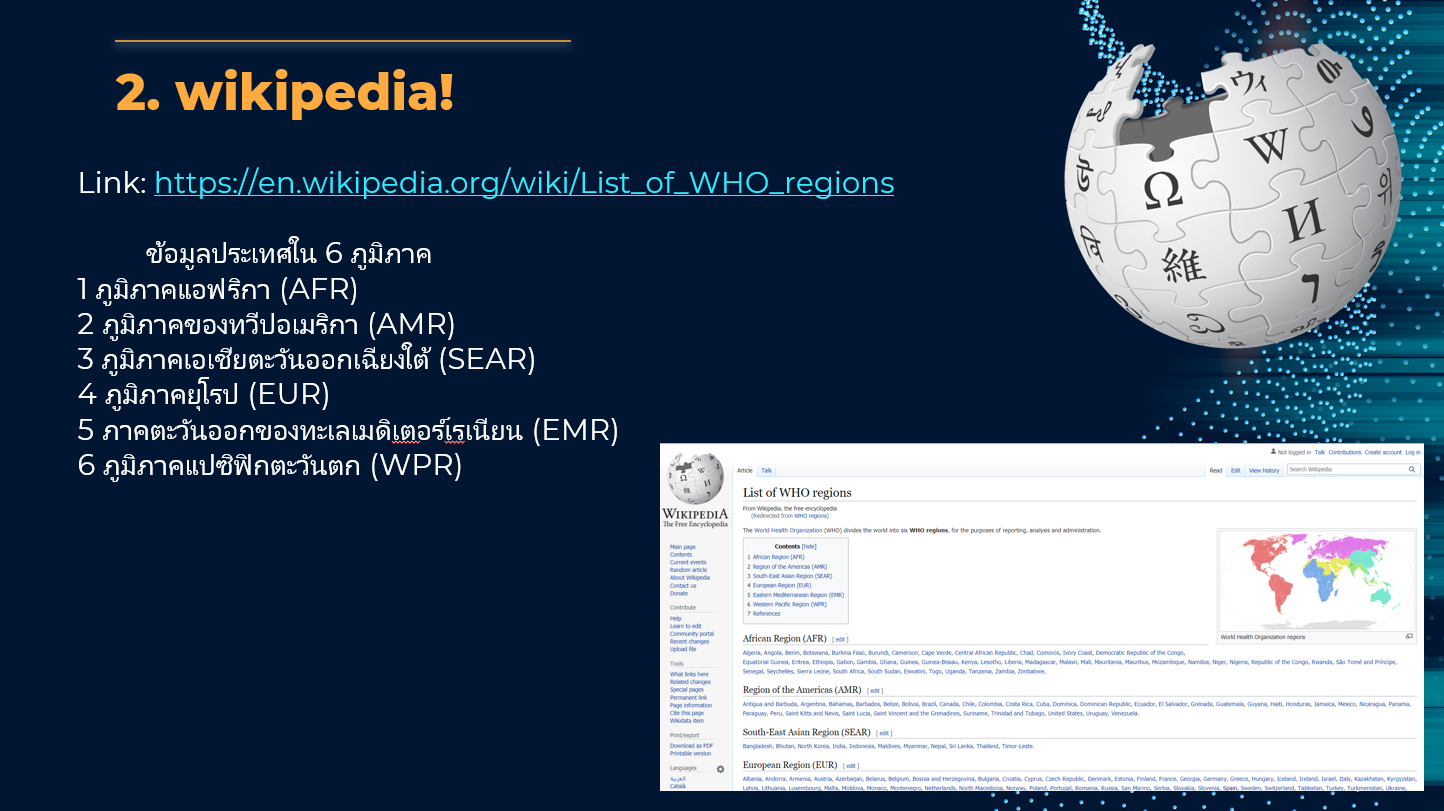

In [38]:
who_region = {}

# African Region AFRO
afro = "Algeria, Angola, Cabo Verde, Eswatini, Sao Tome and Principe, Benin, South Sudan, Western Sahara, Congo (Brazzaville), Congo (Kinshasa), Cote d'Ivoire, Botswana, Burkina Faso, Burundi, Cameroon, Cape Verde, Central African Republic, Chad, Comoros, Ivory Coast, Democratic Republic of the Congo, Equatorial Guinea, Eritrea, Ethiopia, Gabon, Gambia, Ghana, Guinea, Guinea-Bissau, Kenya, Lesotho, Liberia, Madagascar, Malawi, Mali, Mauritania, Mauritius, Mozambique, Namibia, Niger, Nigeria, Republic of the Congo, Rwanda, São Tomé and Príncipe, Senegal, Seychelles, Sierra Leone, Somalia, South Africa, Swaziland, Togo, Uganda, Tanzania, Zambia, Zimbabwe"
afro = [i.strip() for i in afro.split(',')]
for i in afro:
    who_region[i] = 'Africa'
    
# Region of the Americas PAHO
paho = 'Antigua and Barbuda, Argentina, Bahamas, Barbados, Belize, Bolivia, Brazil, Canada, Chile, Colombia, Costa Rica, Cuba, Dominica, Dominican Republic, Ecuador, El Salvador, Grenada, Guatemala, Guyana, Haiti, Honduras, Jamaica, Mexico, Nicaragua, Panama, Paraguay, Peru, Saint Kitts and Nevis, Saint Lucia, Saint Vincent and the Grenadines, Suriname, Trinidad and Tobago, United States, US, Uruguay, Venezuela'
paho = [i.strip() for i in paho.split(',')]
for i in paho:
    who_region[i] = 'Americas'

# South-East Asia Region SEARO
searo = 'Bangladesh, Bhutan, North Korea, India, Indonesia, Maldives, Myanmar, Burma, Nepal, Sri Lanka, Thailand, Timor-Leste'
searo = [i.strip() for i in searo.split(',')]
for i in searo:
    who_region[i] = 'South-East Asia'

# European Region EURO
euro = 'Albania, Andorra, Greenland, Kosovo, Holy See, Liechtenstein, Armenia, Czechia, Austria, Azerbaijan, Belarus, Belgium, Bosnia and Herzegovina, Bulgaria, Croatia, Cyprus, Czech Republic, Denmark, Estonia, Finland, France, Georgia, Germany, Greece, Hungary, Iceland, Ireland, Israel, Italy, Kazakhstan, Kyrgyzstan, Latvia, Lithuania, Luxembourg, Malta, Monaco, Montenegro, Netherlands, North Macedonia, Norway, Poland, Portugal, Moldova, Romania, Russia, San Marino, Serbia, Slovakia, Slovenia, Spain, Sweden, Switzerland, Tajikistan, Turkey, Turkmenistan, Ukraine, United Kingdom, Uzbekistan'
euro = [i.strip() for i in euro.split(',')]
for i in euro:
    who_region[i] = 'Europe'

# Eastern Mediterranean Region EMRO
emro = 'Afghanistan, Bahrain, Djibouti, Egypt, Iran, Iraq, Jordan, Kuwait, Lebanon, Libya, Morocco, Oman, Pakistan, Palestine, West Bank and Gaza, Qatar, Saudi Arabia, Somalia, Sudan, Syria, Tunisia, United Arab Emirates, Yemen'
emro = [i.strip() for i in emro.split(',')]
for i in emro:
    who_region[i] = 'Eastern Mediterranean'

# Western Pacific Region WPRO
wpro = 'Australia, Brunei, Cambodia, China, Cook Islands, Fiji, Japan, Kiribati, Laos, Malaysia, Marshall Islands, Micronesia, Mongolia, Nauru, New Zealand, Niue, Palau, Papua New Guinea, Philippines, South Korea, Samoa, Singapore, Solomon Islands, Taiwan, Taiwan*, Tonga, Tuvalu, Vanuatu, Vietnam'
wpro = [i.strip() for i in wpro.split(',')]
for i in wpro:
    who_region[i] = 'Western Pacific'

In [39]:
# add 'WHO Region' column
full_table['WHO Region'] = full_table['Country/Region'].map(who_region)

# find missing values
full_table[full_table['WHO Region'].isna()]['Country/Region'].unique()

array(['Summer Olympics 2020'], dtype=object)

In [40]:
# Cleaning data
# ===========================================================

# fixing Country values
full_table.loc[full_table['Province/State']=='Greenland', 'Country/Region'] = 'Greenland'

# Active Case = confirmed - deaths - recovered
full_table['Active'] = full_table['Confirmed'] - full_table['Deaths'] - full_table['Recovered']

# replacing Mainland china with just China
full_table['Country/Region'] = full_table['Country/Region'].replace('Mainland China', 'China')

# filling missing values 
full_table[['Province/State']] = full_table[['Province/State']].fillna('')
full_table[['Confirmed', 'Deaths', 'Recovered', 'Active']] = full_table[['Confirmed', 'Deaths', 'Recovered', 'Active']].fillna(0)

# fixing datatypes
full_table['Recovered'] = full_table['Recovered'].astype(int)

full_table.sample(6)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
165500,Saskatchewan,Canada,52.939900,-106.450900,2021-09-06,56533,612,0,55921,Americas
168534,,Bahamas,25.025885,-78.035889,2021-09-17,20030,504,0,19526,Americas
102554,,Kosovo,42.602636,20.902977,2021-01-23,57317,1447,50489,5381,Europe
5296,,Vietnam,14.058324,108.277199,2020-02-09,13,0,1,12,Western Pacific
159467,,Kenya,-0.023600,37.906200,2021-08-15,220727,4340,0,216387,Africa
61960,,Belarus,53.709800,27.953400,2020-08-31,71843,681,70468,694,Europe


### Saving final data

In [43]:
# save data
full_table.to_csv('covid_19_clean_complete.csv', index=False)

In [44]:
!ls

covid_19_clean_complete.csv
time_series_covid19_confirmed_global.csv
time_series_covid19_deaths_global.csv
time_series_covid19_recovered_global.csv


# 3 Data Source: worldometers
Coronavirus Updates Data by worldometers
LINK: https://www.worldometers.info/coronavirus/

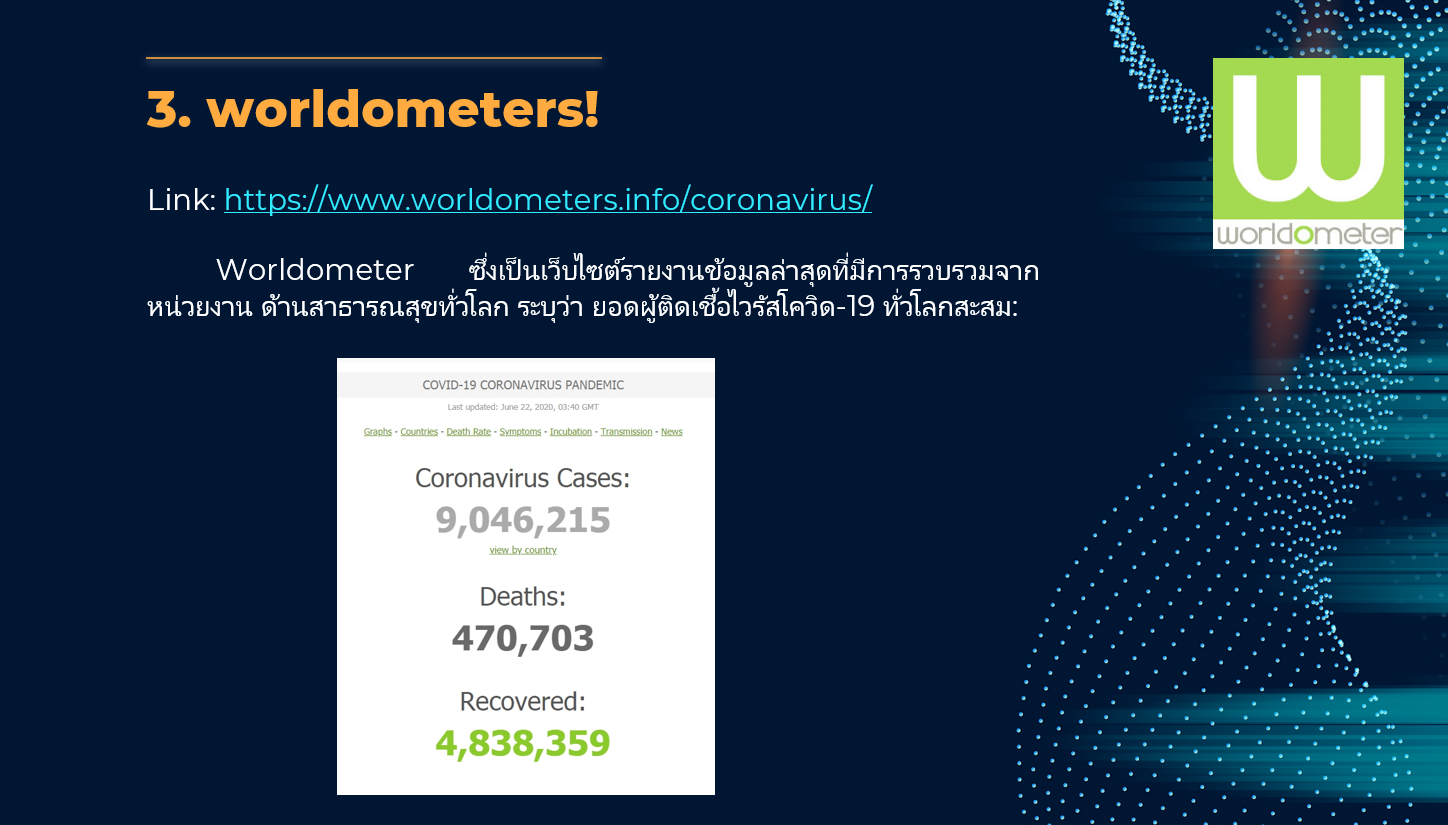

In [45]:
import os
os.chdir( '/content/drive/MyDrive/DPDM_ME/my_project/data') # local path
!pwd

/content/drive/MyDrive/DPDM_ME/my_project/data


## Libraries

In [46]:
# import libraries
# ================

# for date and time opeations
from datetime import datetime
# for file and folder operations
import os
# for regular expression opeations
import re
# for listing files in a folder
import glob
# for getting web contents
import requests 
# storing and analysing data
import pandas as pd
# for scraping web contents
from bs4 import BeautifulSoup
# regular expression
import re
# numerical analysis
import numpy as np

## get data

In [47]:
# get data
# ========

# link at which web data recides
link = 'https://www.worldometers.info/coronavirus/'
# get web data
req = requests.get(link)
# parse web data
soup = BeautifulSoup(req.content, "html.parser")

## find the table

In [48]:
# find the table
# ==============
# our target table is the last table in the page

# get the table head
# table head may contain the column names, titles, subtitles
thead = soup.find_all('thead')[-1]
# print(thead)

# get all the rows in table head
# it usually have only one row, which has the column names
head = thead.find_all('tr')
# print(head)

# get the table tbody
# it contains the contents
tbody = soup.find_all('tbody')[0]
# print(tbody)

# get all the rows in table body
# each row is each state's entry
body = tbody.find_all('tr')
# print(body)

## get the table contents

In [49]:
# get the table contents
# ======================

# container for header rows / column title
head_rows = []
# container for table body / contents
body_rows = []

# loop through the head and append each row to head
for tr in head:
    td = tr.find_all(['th', 'td'])
    row = [i.text for i in td]
    head_rows.append(row)
# print(head_rows)

# loop through the body and append each row to body
for tr in body:
    td = tr.find_all(['th', 'td'])
    row = [i.text for i in td]
    body_rows.append(row)
# print(head_rows)

## save contents in a dataframe

In [50]:
# save contents in a dataframe
# ============================
    
# skip last 3 rows, it contains unwanted info
# head_rows contains column title
df_bs = pd.DataFrame(body_rows[:len(body_rows)-6], 
                     columns=head_rows[0])         

# Drop 'S. No.' column
# df_bs.drop('S. No.', axis=1, inplace=True)

df_bs.head(5)

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,,\nNorth America\n,"53,149,559","+30,686","1,078,022",+838,"41,226,233","+18,264","10,845,304","28,281",,,,,,North America,\n,,,,,
1,,\nAsia\n,"75,806,011","+105,013","1,122,042","+1,548","72,228,721","+130,341","2,455,248","32,463",,,,,,Asia,\n,,,,,
2,,\nSouth America\n,"37,779,963","+1,300","1,154,504",+23,"35,790,666","+1,079","834,793","13,193",,,,,,South America,\n,,,,,
3,,\nEurope\n,"58,989,279","+124,300","1,223,619","+1,689","54,049,446","+94,224","3,716,214","11,957",,,,,,Europe,\n,,,,,
4,,\nAfrica\n,"8,351,281","+2,581","210,646",+45,"7,641,317","+2,878","499,318","3,102",,,,,,Africa,\n,,,,,


In [51]:
df_bs.tail(5)

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
220,213,Vatican City,27,,,,27,,0,,"33,624",,,,803,Europe,30,,,,,
221,214,Solomon Islands,20,,,,20,,0,,28,,"4,500","6,358","707,765",Australia/Oceania,"35,388",,157,,,
222,215,Western Sahara,10,,1,,8,,1,,16,2,,,"615,545",Africa,"61,555","615,545",,,,2
223,216,MS Zaandam,9,,2,,7,,0,,,,,,,,,,,,,
224,217,Palau,5,,,,5,,0,,275,,"9,964","547,442","18,201",Australia/Oceania,"3,640",,2,,,


In [52]:
# drop unwanted rows
df_bs = df_bs.iloc[8:, :-3].reset_index(drop=True)

# drop unwanted columns
df_bs = df_bs.drop('#', axis=1)

# first few rows
df_bs.head()

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl
0,USA,"44,214,497","+15,001","714,098",+145,"33,637,480","+2,778","9,862,919","20,918","132,611","2,142","639,992,884","1,919,502","333,416,037",North America,8,467,1
1,India,"33,765,470","+27,282","448,372",+282,"33,034,902","+27,617","282,196","8,944","24,172",321,"568,956,439","407,310","1,396,864,884",Asia,41,"3,115",2
2,Brazil,"21,399,546",,"596,163",,"20,404,701",,"398,682","8,318","99,794","2,780","57,282,520","267,129","214,437,809",South America,10,360,4
3,UK,"7,807,036","+36,480","136,662",+137,"6,323,896","+31,662","1,346,478",813,"114,256","2,000","303,448,502","4,440,963","68,329,443",Europe,9,500,0
4,Russia,"7,511,026","+23,888","207,255",+867,"6,672,767","+18,826","631,004","2,300","51,441","1,419","191,500,000","1,311,533","146,012,318",Europe,19,705,1


In [53]:
df_bs.drop(['1 Caseevery X ppl',	'1 Deathevery X ppl',	'1 Testevery X ppl'], axis='columns', inplace=True)

In [54]:
# rename columns
df_bs.columns = ['Country/Region', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths',
       'TotalRecovered', 'NewRecovered', 'ActiveCases', 'Serious,Critical',
       'Tot Cases/1M pop', 'Deaths/1M pop', 'TotalTests', 'Tests/1M pop',
       'Population', 'Continent']

# rearrange and subselect columns
df_bs = df_bs[['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths',
       'TotalRecovered', 'NewRecovered', 'ActiveCases', 'Serious,Critical',
       'Tot Cases/1M pop', 'Deaths/1M pop', 'TotalTests', 'Tests/1M pop' ]]

# first few rows
df_bs.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop
0,USA,North America,"333,416,037","44,214,497","+15,001","714,098",+145,"33,637,480","+2,778","9,862,919","20,918","132,611","2,142","639,992,884","1,919,502"
1,India,Asia,"1,396,864,884","33,765,470","+27,282","448,372",+282,"33,034,902","+27,617","282,196","8,944","24,172",321,"568,956,439","407,310"
2,Brazil,South America,"214,437,809","21,399,546",,"596,163",,"20,404,701",,"398,682","8,318","99,794","2,780","57,282,520","267,129"
3,UK,Europe,"68,329,443","7,807,036","+36,480","136,662",+137,"6,323,896","+31,662","1,346,478",813,"114,256","2,000","303,448,502","4,440,963"
4,Russia,Europe,"146,012,318","7,511,026","+23,888","207,255",+867,"6,672,767","+18,826","631,004","2,300","51,441","1,419","191,500,000","1,311,533"


In [55]:
who_region = {}

# African Region AFRO
afro = "Algeria, Angola, Cabo Verde, Congo, DRC, Eswatini, Sao Tome and Principe, Benin, South Sudan, Western Sahara, Congo (Brazzaville), Congo (Kinshasa), Cote d'Ivoire, Botswana, Burkina Faso, Burundi, Cameroon, Cape Verde, Central African Republic, Chad, Comoros, Ivory Coast, Democratic Republic of the Congo, Equatorial Guinea, Eritrea, Ethiopia, Gabon, Gambia, Ghana, Guinea, Guinea-Bissau, Kenya, Lesotho, Liberia, Madagascar, Malawi, Mali, Mauritania, Mauritius, Mozambique, Namibia, Niger, Nigeria, Republic of the Congo, Rwanda, São Tomé and Príncipe, Senegal, Seychelles, Sierra Leone, Somalia, South Africa, Swaziland, Togo, Uganda, Tanzania, Zambia, Zimbabwe"
afro = [i.strip() for i in afro.split(',')]
for i in afro:
    who_region[i] = 'Africa'
    
# Region of the Americas PAHO
paho = 'Antigua and Barbuda, Argentina, Bahamas, Barbados, Belize, Bermuda, Bolivia, Brazil, Canada, Chile, Colombia, Costa Rica, Cuba, Dominica, Dominican Republic, Ecuador, El Salvador, Grenada, Guatemala, Guyana, Haiti, Honduras, Jamaica, Mexico, Nicaragua, Panama, Paraguay, Peru, Saint Kitts and Nevis, Saint Lucia, Saint Vincent and the Grenadines, Suriname, Trinidad and Tobago, United States, US, USA, Uruguay, Venezuela'
paho = [i.strip() for i in paho.split(',')]
for i in paho:
    who_region[i] = 'Americas'

# South-East Asia Region SEARO
searo = 'Bangladesh, Bhutan, North Korea, India, Indonesia, Maldives, Myanmar, Burma, Nepal, Sri Lanka, Thailand, Timor-Leste'
searo = [i.strip() for i in searo.split(',')]
for i in searo:
    who_region[i] = 'South-East Asia'

# European Region EURO
euro = 'Albania, Andorra, Greenland, Kosovo, Holy See, Vatican City, Liechtenstein, Armenia, Czechia, Austria, Azerbaijan, Belarus, Belgium, Bosnia and Herzegovina, Bulgaria, Croatia, Cyprus, Czech Republic, Denmark, Estonia, Finland, France, Georgia, Germany, Greece, Hungary, Iceland, Ireland, Israel, Italy, Kazakhstan, Kyrgyzstan, Latvia, Lithuania, Luxembourg, Malta, Monaco, Montenegro, Netherlands, North Macedonia, Norway, Poland, Portugal, Moldova, Romania, Russia, San Marino, Serbia, Slovakia, Slovenia, Spain, Sweden, Switzerland, Tajikistan, Turkey, Turkmenistan, Ukraine, United Kingdom, UK, Uzbekistan'
euro = [i.strip() for i in euro.split(',')]
for i in euro:
    who_region[i] = 'Europe'

# Eastern Mediterranean Region EMRO
emro = 'Afghanistan, Bahrain, Djibouti, Egypt, Iran, Iraq, Jordan, Kuwait, Lebanon, Libya, Morocco, Oman, Pakistan, Palestine, West Bank and Gaza, Qatar, Saudi Arabia, Somalia, Sudan, Syria, Tunisia, United Arab Emirates, UAE, Yemen'
emro = [i.strip() for i in emro.split(',')]
for i in emro:
    who_region[i] = 'Eastern Mediterranean'

# Western Pacific Region WPRO
wpro = 'Australia, Brunei, Cambodia, China, Cook Islands, Fiji, Japan, Hong Kong, Kiribati, Laos, Malaysia, Marshall Islands, Micronesia, Mongolia, Nauru, New Zealand, Niue, Palau, Papua New Guinea, Philippines, South Korea, S. Korea, Samoa, Singapore, Solomon Islands, Taiwan, Taiwan*, Tonga, Tuvalu, Vanuatu, Vietnam'
wpro = [i.strip() for i in wpro.split(',')]
for i in wpro:
    who_region[i] = 'Western Pacific'

In [56]:
# addding 'WHO Region' column
df_bs['WHO Region'] = df_bs['Country/Region'].map(who_region)

# countries with missing "WHO Region"
df_bs[df_bs['WHO Region'].isna()]['Country/Region'].unique()

array(['Réunion', 'Guadeloupe', 'Martinique', 'French Guiana',
       'French Polynesia', 'Mayotte', 'Curaçao', 'Aruba',
       'Channel Islands', 'CAR', 'Isle of Man', 'New Caledonia',
       'Brunei ', 'Gibraltar', 'Sint Maarten', 'Saint Martin',
       'St. Vincent Grenadines', 'Turks and Caicos',
       'British Virgin Islands', 'Caribbean Netherlands', 'St. Barth',
       'Faeroe Islands', 'Cayman Islands', 'Diamond Princess',
       'Wallis and Futuna', 'Anguilla', 'Macao', 'Falkland Islands',
       'Montserrat', 'Saint Pierre Miquelon', 'MS Zaandam'], dtype=object)

In [57]:
# fix data
for col in df_bs.columns[2:]:
    # replace comma with empty string
    df_bs[col] = df_bs[col].str.replace('[,+ ]', '', regex=True)
    # replace 'N/A' with empty string
    df_bs[col] = df_bs[col].str.replace('N/A', '', regex=False)

# replace empty strings with np.nan
df_bs = df_bs.replace('', np.nan)

In [58]:
# first few rows
df_bs.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,333416037,44214497,15001,714098,145,33637480,2778,9862919,20918,132611,2142,639992884,1919502,Americas
1,India,Asia,1396864884,33765470,27282,448372,282,33034902,27617,282196,8944,24172,321,568956439,407310,South-EastAsia
2,Brazil,South America,214437809,21399546,NaN,596163,NaN,20404701,NaN,398682,8318,99794,2780,57282520,267129,Americas
3,UK,Europe,68329443,7807036,36480,136662,137,6323896,31662,1346478,813,114256,2000,303448502,4440963,Europe
4,Russia,Europe,146012318,7511026,23888,207255,867,6672767,18826,631004,2300,51441,1419,191500000,1311533,Europe


In [59]:
# first few rows
df_bs.tail()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
212,Vatican City,Europe,803,27,NaN,NaN,NaN,27,NaN,0,NaN,33624,NaN,NaN,NaN,Europe
213,Solomon Islands,Australia/Oceania,707765,20,NaN,NaN,NaN,20,NaN,0,NaN,28,NaN,4500,6358,WesternPacific
214,Western Sahara,Africa,615545,10,NaN,1,NaN,8,NaN,1,NaN,16,2,NaN,NaN,Africa
215,MS Zaandam,NaN,NaN,9,NaN,2,NaN,7,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
216,Palau,Australia/Oceania,18201,5,NaN,NaN,NaN,5,NaN,0,NaN,275,NaN,9964,547442,WesternPacific


In [60]:
# save as .csv file
df_bs.to_csv('worldometer_covid.csv', index=False)